In [6]:
import pandas as pd
import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin


from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

### SCIKIT-LEARN PIPELINE

In [13]:
df = pd.read_csv('../notebooks/telco_modeling_dataset.csv')
df.head(5)

,Partner_Encoded,Dependents_Encoded,PhoneService_Encoded,PaperlessBilling_Encoded,TenureCategory_Encoded,ServiceAdoptionLevel_Encoded,OnlineSecurity_Binary,OnlineBackup_Binary,DeviceProtection_Binary,TechSupport_Binary,...,tenure_StandardScaled,MonthlyCharges_StandardScaled,TotalCharges_StandardScaled,ServiceAdoptionScore_StandardScaled,AvgChargesPerService_StandardScaled,TotalServices_StandardScaled,PaymentReliabilityScore_StandardScaled,ContractReliabilityScore_StandardScaled,OverallReliabilityScore_StandardScaled,Churn
0,1,0,0,1,0,0,0,1,0,0,...,-1.277445,-1.160323,-0.992611,-0.561776,-0.747250,-0.928083,-1.260243,-0.828207,-1.265975,0
1,0,0,1,0,1,1,1,0,1,0,...,0.066327,-0.259629,-0.172165,-0.020519,-0.347094,-0.063239,-0.114079,0.371271,0.148519,0
2,0,0,1,1,0,1,1,1,0,0,...,-1.236724,-0.362660,-0.958066,-0.020519,-0.519384,-0.063239,-0.114079,-0.828207,-0.558728,1
3,0,0,0,0,1,1,1,0,1,1,...,0.514251,-0.746535,-0.193672,0.520738,-1.161299,-0.063239,1.032084,0.371271,0.855766,0
4,0,0,1,1,0,0,0,0,0,0,...,-1.236724,0.197365,-0.938874,-1.103033,3.036627,-0.928083,-1.260243,-0.828207,-1.265975,1


### CLASS IMBALANCE HANDLING

In [14]:
X = df.drop(columns=['Churn'])
Y = df['Churn']

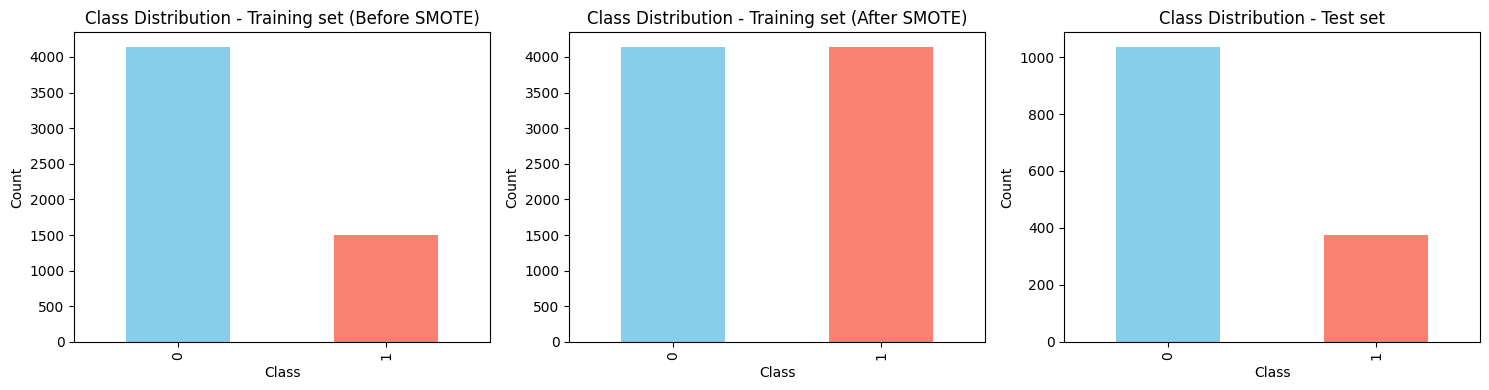

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y,
    test_size=0.2,
    random_state=42,
    stratify=Y   # keep class ratio consistent
)

smote = SMOTE(random_state=42)
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train, Y_train)


plt.figure(figsize=(15,4))

plt.subplot(131)
Y_train.value_counts().plot(kind='bar', color=['skyblue','salmon'])
plt.title('Class Distribution - Training set (Before SMOTE)')
plt.xlabel('Class')
plt.ylabel('Count')

plt.subplot(132)
Y_train_resampled.value_counts().plot(kind='bar', color=['skyblue','salmon'])
plt.title('Class Distribution - Training set (After SMOTE)')
plt.xlabel('Class')
plt.ylabel('Count')

plt.subplot(133)
Y_test.value_counts().plot(kind='bar', color=['skyblue','salmon'])
plt.title('Class Distribution - Test set')
plt.xlabel('Class')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [16]:
np.savez('../artifacts/X_train.npz', X_train_resampled)
np.savez('../artifacts/Y_train.npz', Y_train_resampled)
np.savez('../artifacts/X_test.npz', X_test)
np.savez('../artifacts/Y_test.npz', Y_test)